## 第零部分 初始化

In [12]:
# import packages
import pandas as pd
import numpy as np

# to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

# setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [17]:
# read the file
df = pd.read_csv('../res/data_meg.csv')

# print the head
df.head()

gold  broad_money  petrol_future     M_0
0  331.10      28022.1          28.06  7063.8
1  335.35      28022.1          28.03  7063.8
2  340.90      28022.1          27.99  7063.8
3  321.15      28022.1          27.27  7063.8
4  320.50      28022.1          27.31  7063.8

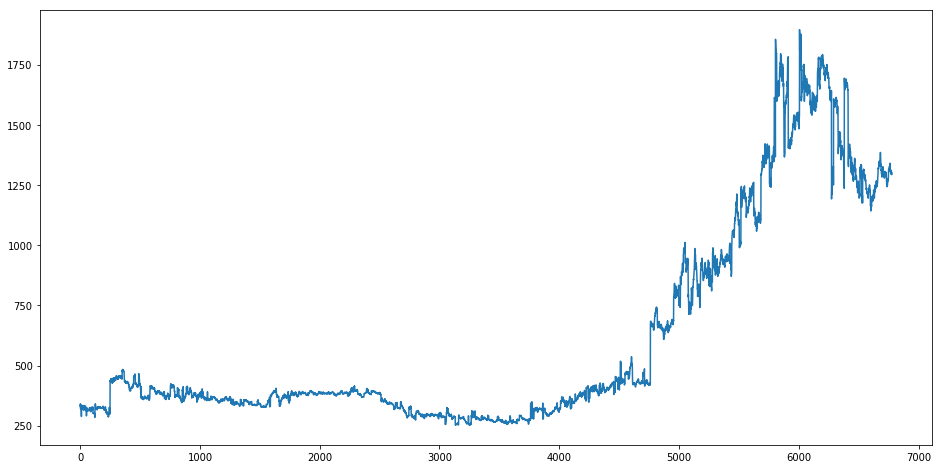

In [18]:
# setting index as date
# df['Ndate'] = pd.to_datetime(df.Ndate,format='%Y-%m-%d')
# df.index = df['Ndate']

# plot
plt.figure(figsize=(16,8))
plt.plot(df['gold'], label='Price History')

In [43]:
# splitting into train and validation
train = df[:5500].copy()
valid = df[5500:].copy()

df.shape, train.shape, valid.shape

((6777, 4), (5500, 4), (1277, 4))

## 第一部分 滑动平均

In [44]:
#make predictions
preds = []
for i in range(0,1277):
    a = train['gold'][len(train)-1277+i:].sum() + sum(preds)
    b = a/1277
    preds.append(b)
preds

[666.9836726703211,
 667.2301360005249,
 667.4761658642685,
 667.6808065579758,
 667.8843545662436,
 668.0863000279243,
 668.293023833741,
 668.497560265874,
 668.7019436333492,
 668.9060955077684,
 669.1102114791919,
 669.3150746048607,
 669.5183362137918,
 669.7212088341628,
 669.9251800235395,
 670.1293109397677,
 670.3314482231976,
 670.5304156846097,
 670.7295389545271,
 670.9684814282581,
 671.2092554935896,
 671.4547208463645,
 671.7027276755316,
 671.95280812007,
 672.2068823629205,
 672.4604507907693,
 672.6736148086164,
 672.8860843581924,
 673.098367901151,
 673.3104652918333,
 673.5226113100726,
 673.765777019791,
 673.9836828749357,
 674.2030123055347,
 674.4215346331036,
 674.6408937048601,
 674.8623039583487,
 675.0840050577679,
 675.3025516553072,
 675.5222090959143,
 675.7349907788399,
 675.9484480934669,
 676.1596058445191,
 676.370889795846,
 676.5828090517551,
 676.7903132091958,
 677.0088255922883,
 677.2300541166361,
 677.447422992217,
 677.6604984996501,
 677.872

In [45]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['gold'])-preds),2)))
rms

677.9595705014203

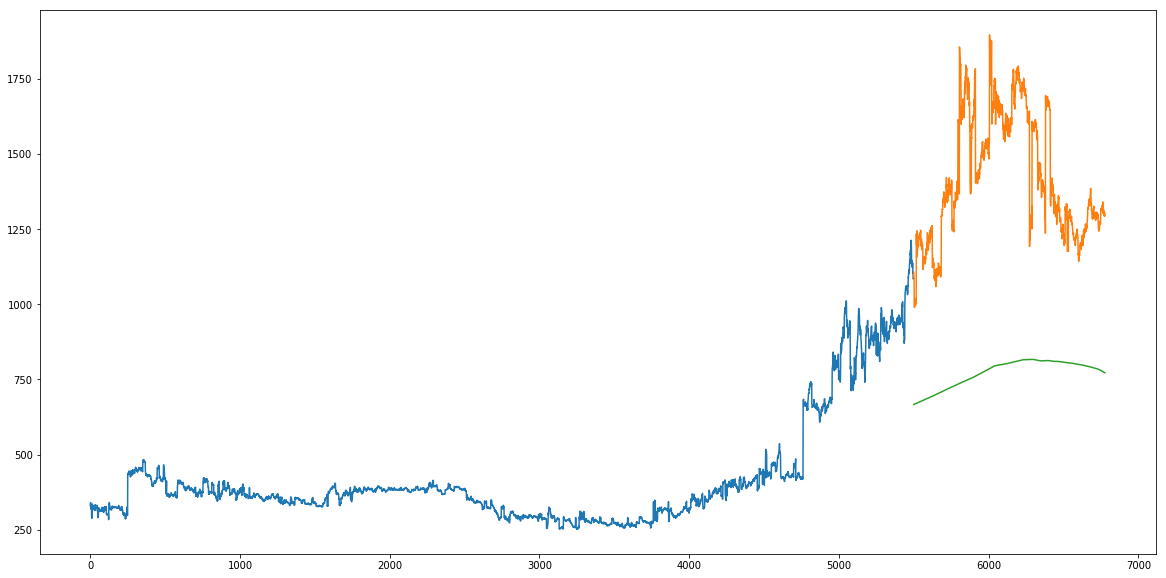

In [46]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['gold'])
plt.plot(valid[['gold', 'Predictions']])

In [ ]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date'] 

#sorting
data = df.sort_index(ascending=True, axis=0) 

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close']) 
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#create features
from fastai.structured import  add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

## 第二部分 长短期记忆网络(LSTM)